In [1]:
#python 3.7
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import methpype/methQC: run from the methpype folder; validate using right location files for testing
from pprint import pprint as pp
import sys
import os
sys.path.insert(0,"/Users/mmaxmeister/legx/methpype") # even though methpype is pip installed, this is still necessary on my machine (MM)
import methpype

In [3]:
# load sample data
os.chdir('/Users/mmaxmeister/legx/methpype')
data_dir = 'docs/example_data/GSE69852'
datas = methpype.run_pipeline(data_dir)

100%|██████████| 2/2 [00:21<00:00, 10.86s/it]


In [4]:
# the default "export" output is a CSV file for each sample
# the default python interpreter scripted output is a list of dataframes, one per sample.
# this transforms methpype's output into a single dataframe of beta values, usable with methQC.
betas = methpype.consolidate_values_for_sheet(datas)

In [5]:
betas.head()

,9247377093_R02C01,9247377085_R04C02
IlmnID,,
cg00035864,0.236234,0.308176
cg00061679,0.427194,0.525169
cg00063477,0.929039,0.932739
cg00121626,0.481058,0.330045
cg00223952,0.044029,0.022201


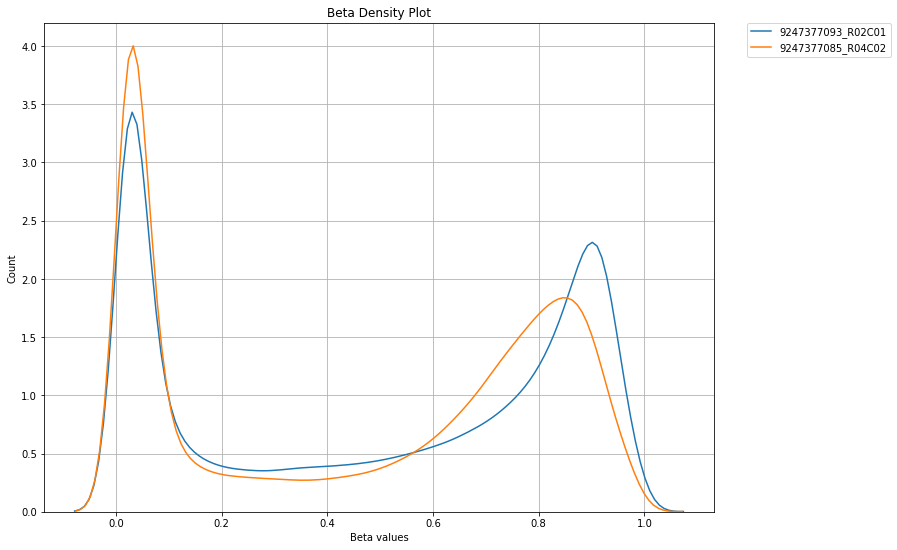

In [6]:
#methQC doesn't have an __init__.py yet or any setup.py, so you must load it as a file using os.
os.chdir('/Users/mmaxmeister/legx/methQC')
import methQC.postprocessQC as postQC
postQC.betaDensityPlot(betas)

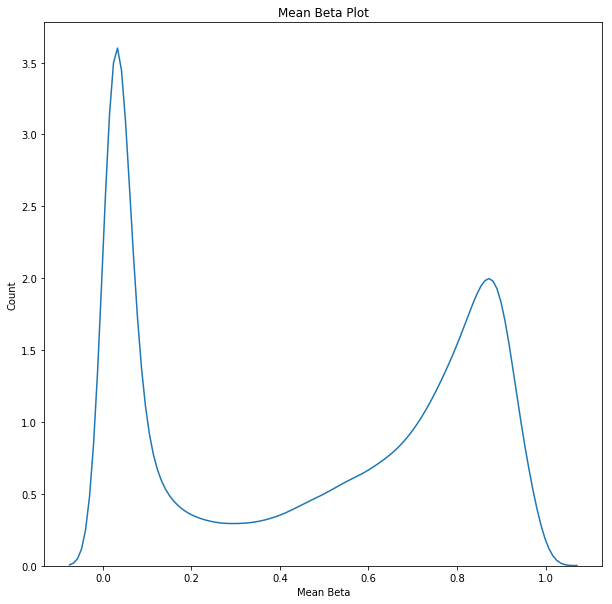

In [7]:
# this is a mushed average of all samples into one line.
postQC.meanBetaPlot(betas)

23it [00:00, 227.05it/s]

Calculating area under curve for each sample.


23389it [18:18,  9.57it/s]

KeyboardInterrupt: 

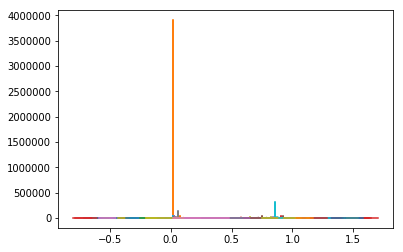

In [9]:
#postQC.cumulativeSumBetaDistribution(betas, cutoff=0.7, plot=True)


In [ ]:
#postQC.DNAmAgeHannumFunction(betas)


In [ ]:
# apply some derivative method to each trace to predict the number of peaks, then recommend excluding samples with !=2 peaks.
